In [1]:
#importing for data connection
import sqlite3
conn = sqlite3.connect("database.sqlite")
cur = conn.cursor()


In [2]:

import pandas as pd
cur.execute('''SELECT * FROM matches''')#SQL queries for data extraction from Tables
matches = pd.DataFrame(cur.fetchall())
matches.columns = (x[0] for x in cur.description)
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [111]:
#unique teams dataset Goal The name of the team
cur.execute('''SELECT * FROM Unique_Teams''')
teams = pd.DataFrame(cur.fetchall())
teams.columns = (x[0] for x in cur.description)
teams['TeamName']

0      Bayern Munich
1           Dortmund
2         Leverkusen
3         RB Leipzig
4         Schalke 04
           ...      
123          Burnley
124        Blackpool
125          Swansea
126          Cardiff
127      Bournemouth
Name: TeamName, Length: 128, dtype: object

In [3]:
#The total number of goals scored by the team during the 2011 season
cur.execute('''SELECT 
home.team
,SUM(home.win + away.win) as wins
,SUM(home.loss + away.loss) as losses
,SUM(home.draw + away.draw) as draws
,SUM(home.goals_scored + away.goals_scored) as goals_scored
,SUM(home.goals_conceded + away.goals_conceded) as goals_conceded
FROM
(SELECT 
HomeTeam AS Team
,SUM(CASE WHEN FTR = 'H' THEN 1 ELSE 0 END) AS WIN
,SUM(CASE WHEN FTR = 'A' THEN 1 ELSE 0 END) AS Loss
,SUM(CASE WHEN FTR = 'D' THEN 1 ELSE 0 END) AS Draw
,SUM(FTHG) AS Goals_scored
,SUM(FTAG) AS Goals_conceded
FROM 
matches
WHERE 
season = '2011'
GROUP BY HomeTeam) home
LEFT JOIN
(SELECT 
AwayTeam AS Team
,CASE WHEN FTR = 'A' THEN 1 ELSE 0 END AS WIN
,CASE WHEN FTR = 'H' THEN 1 ELSE 0 END AS Loss
,CASE WHEN FTR = 'D' THEN 1 ELSE 0 END AS Draw
,SUM(FTAG) AS Goals_scored
,SUM(FTHG) AS Goals_conceded
FROM 
matches
WHERE 
season = '2011'
GROUP BY AwayTeam) away ON home.team = away.team
GROUP BY home.team ''')
final = pd.DataFrame(cur.fetchall())
final.columns = (x[0] for x in cur.description)
final.head()

,Team,wins,losses,draws,goals_scored,goals_conceded
0,Aachen,4,8,6,30,47
1,Arsenal,12,3,5,74,49
2,Aston Villa,4,8,8,37,53
3,Augsburg,6,5,7,36,49
4,Bayern Munich,15,2,1,77,22


In [4]:
#retrieving 2011 seasons game
yr_11 = pd.DataFrame(cur.execute('''SELECT * FROM matches WHERE season == 2011''').fetchall())
yr_11.columns = [x[0] for x in cur.description]
yr_11.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [5]:
away_wins = yr_11[yr_11['FTR'] =='A']['AwayTeam'].value_counts()#counting Away wins for 2011

In [6]:
home_wins = yr_11[yr_11['FTR'] =='H']['HomeTeam'].value_counts()#counting home wins for 2011

In [112]:
#adding home and away wins in a dataframe
wins=away_wins+home_wins
total_wins=pd.DataFrame({'team':wins.index, 'total_wins':wins.values})
total_wins.head()


,team,total_wins
0,Aachen,6
1,Arsenal,21
2,Aston Villa,7
3,Augsburg,8
4,Bayern Munich,23


In [8]:
away_loss = yr_11[yr_11['FTR'] =='D']['AwayTeam'].value_counts()#counting Away loss for 2011

In [9]:
home_loss = yr_11[yr_11['FTR'] =='D']['HomeTeam'].value_counts()#counting home loss for 2011

In [79]:
#adding home and away loss in a dataframe
loss=away_loss+home_loss
total_loss=pd.DataFrame({'team':loss.index, 'total_loss':loss.values})
result = pd.merge(total_wins, total_loss, on='team')#merging win and loss datframe
result.head()

,team,total_wins,total_loss
0,Aachen,6,13
1,Arsenal,21,7
2,Aston Villa,7,17
3,Augsburg,8,14
4,Bayern Munich,23,4


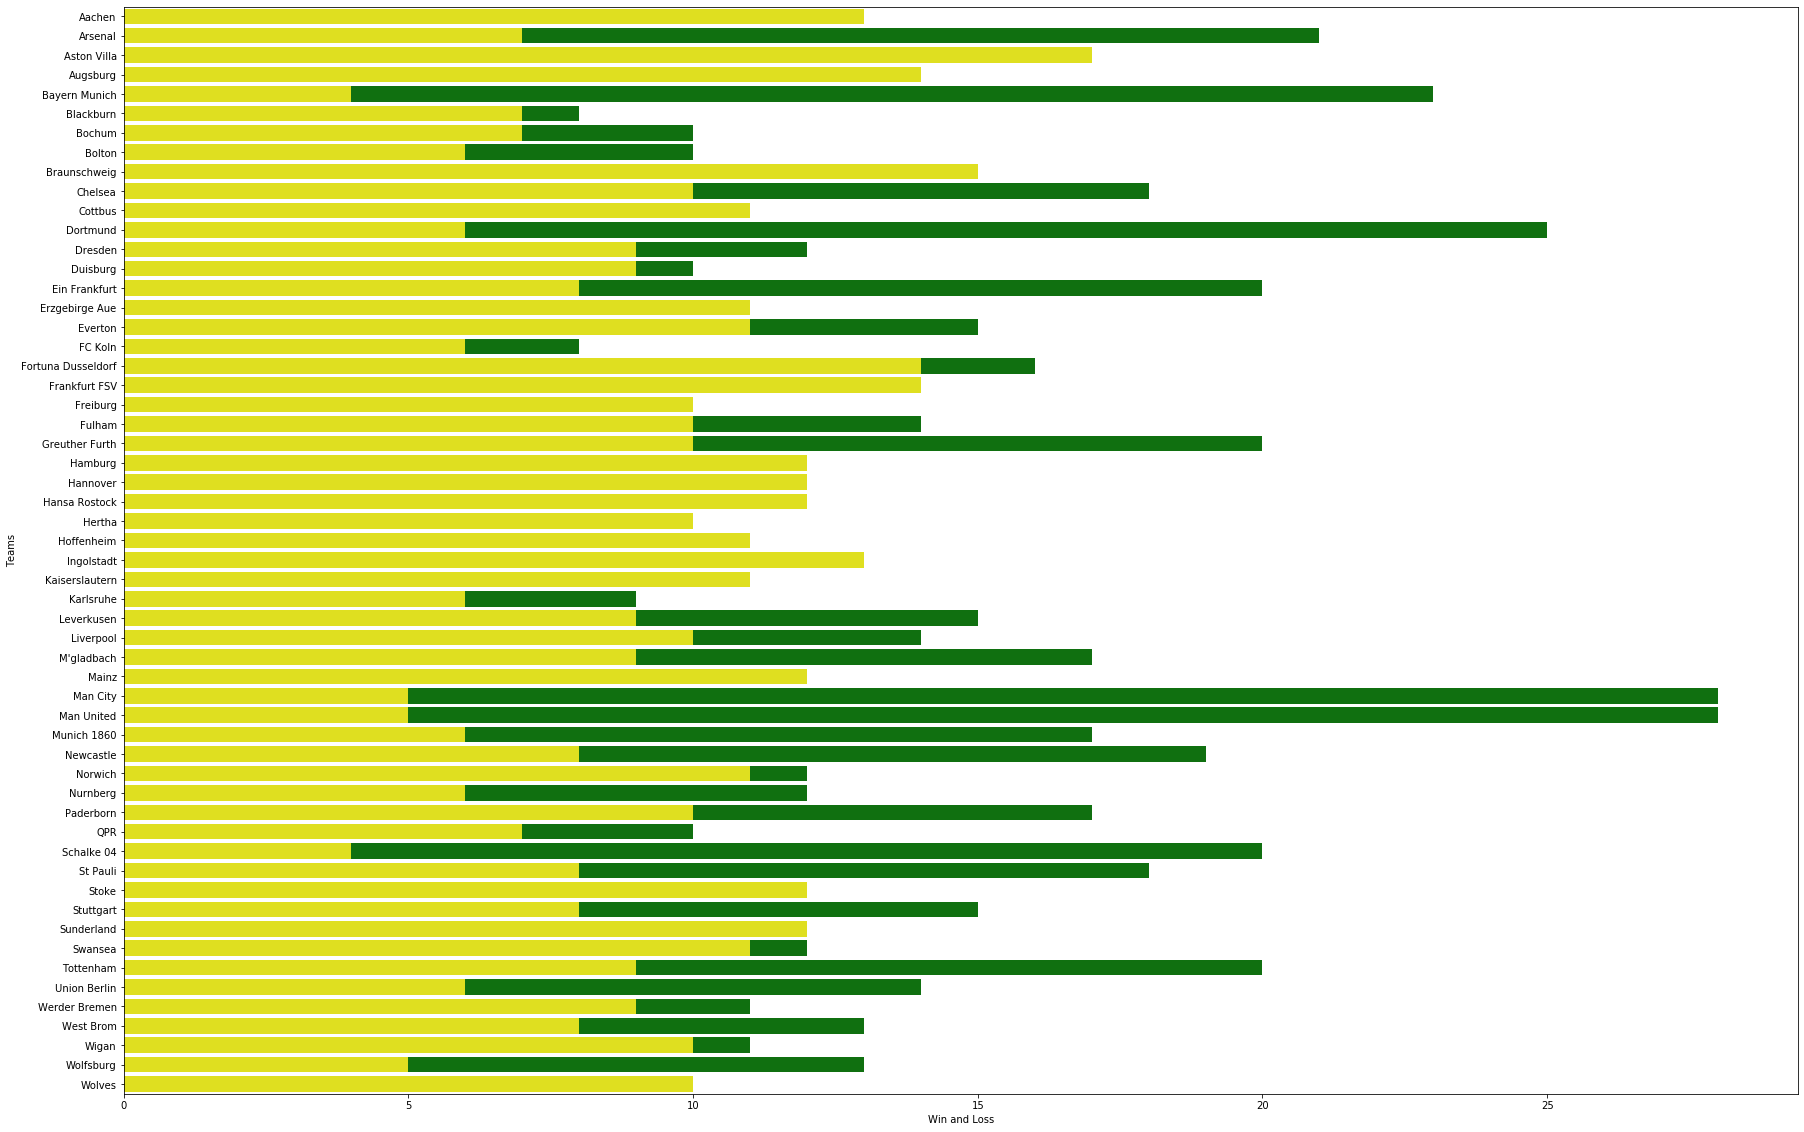

In [80]:
#plotting wins and loss for each team in 2011
import matplotlib.pyplot as plt
import seaborn as sns
# Make the plot

plt.figure(figsize=(30,20))
ax = sns.barplot(x="total_wins" , y = "team", data=result , color='green')
ax2 = sns.barplot(x='total_loss', y="team", data=result, color ='yellow')
plt.xlabel("Win and Loss")
plt.ylabel("Teams")
plt.show()

In [12]:
cur.execute("""Select Season , Date , HomeTeam AS team  ,Div, sum(FTHG) AS home_goals,FTR
               From Matches
               Where Season == '2011'
               and  Div != 'E0'
               Group By HomeTeam
;""")

In [13]:
df = pd.DataFrame(cur.fetchall())
df.columns = (x[0] for x in cur.description)
df.head(10)

,Season,Date,team,Div,home_goals,FTR
0,2011,2012-03-30,Aachen,D2,15,A
1,2011,2011-11-06,Augsburg,D1,20,A
2,2011,2011-11-19,Bayern Munich,D1,49,A
3,2011,2012-03-02,Bochum,D2,23,A
4,2011,2011-10-22,Braunschweig,D2,21,A
5,2011,2011-07-15,Cottbus,D2,18,H
6,2011,2012-04-11,Dortmund,D1,44,H
7,2011,2012-02-24,Dresden,D2,30,H
8,2011,2011-08-26,Duisburg,D2,23,H
9,2011,2012-03-16,Ein Frankfurt,D2,38,H


In [15]:
cur.execute("""Select Season , Date , AwayTeam AS team ,Div, sum(FTAG) AS away_goals,FTR
               From Matches
               Where Season == '2011'
               and  Div != 'E0'
               Group By AwayTeam
;""")

In [16]:
df1 = pd.DataFrame(cur.fetchall())
df1.columns = (x[0] for x in cur.description)
df1.head()
# df1.columns=['Season','Date','Team','Div','Total_Goals','FTR']

,Season,Date,team,Div,away_goals,FTR
0,2011,2011-11-20,Aachen,D2,15,H
1,2011,2011-08-27,Augsburg,D1,16,H
2,2011,2012-03-31,Bayern Munich,D1,28,A
3,2011,2011-11-27,Bochum,D2,18,H
4,2011,2011-11-18,Braunschweig,D2,16,H


In [37]:
# total=pd.merge(df,df1,how='inner',on=['Date'])
# total

In [18]:
# df['Total_Goals'] = df['sum(FTHG)'] + df1['sum(FTAG)']
# df

In [19]:
# df.drop(['sum(FTHG)','Div'],axis=1,inplace=True)

In [20]:
# df.columns=['Season','date','Team','Total_Goals']

In [21]:
# for loading weather api 
import requests
import json
lat = 52.5200#berlin lattitude
long = 13.4050#berlin longitude
f_dict = {'Date':[], 'forecast':[]}#dictionary to store date and forecast
for Date in list(yr_11['Date']):
    weather = requests.get(f'https://api.darksky.net/forecast/481ef956c3470ce5de61e18f0817864a/{lat},{long},{Date}T17:00:00')
    f_dict['Date'].append(Date)
    f_json = weather.json()
    try:
        weather = f_json['currently']['summary']
    except:
        try:
            weather = f_json['hourly']['summary']
        except:
            weather = 'no rain'
    f_dict['forecast'].append(weather)

In [22]:
f_dict.keys()

dict_keys(['Date', 'forecast'])

In [23]:
f_dict.values()

dict_values([['2012-03-31', '2011-12-11', '2011-08-13', '2011-11-27', '2012-02-18', '2012-01-20', '2012-02-04', '2012-04-21', '2011-09-18', '2011-10-23', '2011-10-01', '2012-03-03', '2011-08-27', '2012-03-17', '2011-11-06', '2012-05-05', '2012-04-11', '2011-08-27', '2011-12-17', '2012-02-18', '2012-02-03', '2011-08-13', '2011-10-29', '2012-01-22', '2011-12-03', '2012-04-14', '2011-09-18', '2012-03-25', '2012-03-10', '2012-04-07', '2011-11-19', '2011-10-14', '2011-09-24', '2012-04-28', '2011-12-18', '2012-03-02', '2012-03-16', '2012-02-17', '2011-08-06', '2011-11-04', '2011-09-16', '2011-07-15', '2011-11-27', '2012-05-06', '2012-02-11', '2011-10-02', '2012-03-30', '2012-04-11', '2011-10-22', '2012-04-21', '2011-08-26', '2011-08-07', '2012-02-24', '2011-12-18', '2011-07-17', '2012-04-11', '2011-11-06', '2012-02-12', '2011-08-22', '2011-10-23', '2011-09-09', '2012-04-01', '2011-09-25', '2012-04-20', '2011-11-25', '2012-03-25', '2012-05-06', '2012-03-09', '2011-11-07', '2011-09-10', '2011-

In [24]:
df_weather=pd.DataFrame(f_dict)
df_weather['forecast'].unique()

array(['Mostly Cloudy', 'Mostly cloudy throughout the day.',
       'Partly Cloudy', 'no rain', 'Foggy overnight and in the morning.',
       'Partly cloudy throughout the day.', 'Foggy in the morning.',
       'Clear', 'Overcast', 'Rain overnight and in the evening.',
       'Drizzle overnight and in the evening.',
       'Light rain overnight and in the morning.', 'Light Rain'],
      dtype=object)

In [74]:
df_weather.head(20)
result = pd.merge(df, df_weather, on='Date')

# table = pivot_table(df_weather, index=['date'], columns=['date','forecast'])

In [76]:
# df_weather['Date'=='2012-05-30']
# df_weather.loc[lambda df_weather: df_weather['Date'] == '2012-03-30']
# cur.execute('''SELECT df_weather.Date,forecast,count(1) from df_weather GROUPBY Date,forecast''' )
# data = pd.DataFrame(cur.fetchall())
# data.columns = (x[0] for x in cur.description)
# data.head()
# pd.read_sql_query('''SELECT Date,forecast,count(1) from df_weather GROUPBY Date,forecast ''',con=conn)


In [102]:
result = pd.merge(yr_11, df_weather,how='left', on='Date')
result['rain']=result['forecast'].apply(lambda x: 1 if x == 'Light Rain' else 0)
result.head()
# result['rain'].value_counts()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,forecast,rain
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Mostly Cloudy,0
1,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Mostly Cloudy,0
2,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Mostly Cloudy,0
3,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Mostly Cloudy,0
4,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,Mostly Cloudy,0


In [101]:
no_rain= result['rain'].value_counts()[0] # first value of the result above
rainyday = result['rain'].value_counts()[1] # second value of the result above
total_day = no_rain + rainyday # total count 
print (float(rainyday) / total_day) # rainy day percentage

0.0011133603238866396


In [28]:
import pymongo

In [29]:
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [30]:

# grab a database from your server 
mydb = myclient['result']